In [1]:
import pymove as pm
import pandas as pd
import numpy as np
import utilities.constants as const

from core.TrajectoryDF import NumPandasTraj as TrajDF
from preprocessing.filters import Filters as filt
from features.spatial_features import SpatialFeatures as spatial
from utilities.conversions import Conversions as con
from preprocessing.interpolation import Interpolation as ip

In [2]:
atlantic = pd.read_csv('./data/atlantic.csv')
atlantic = con.convert_directions_to_degree_lat_lon(atlantic, 'Latitude',"Longitude")
def convert_to_datetime(row):
        this_date = '{}-{}-{}'.format(str(row['Date'])[0:4], str(row['Date'])[4:6], str(row['Date'])[6:])
        this_time = '{:02d}:{:02d}:00'.format(int(row['Time']/100), int(str(row['Time'])[-2:]))
        return '{} {}'.format(this_date, this_time)
atlantic['DateTime'] = atlantic.apply(convert_to_datetime, axis=1)

gulls = pd.read_csv('./data/gulls.csv')

#geolife = pd.read_csv('./data/geolife_sample.csv')

In [3]:
%%time
#
np_atlantic = TrajDF(atlantic,
                         latitude='Latitude',
                         longitude='Longitude',
                         datetime='DateTime',
                         traj_id='ID',
                         rest_of_columns=[])
#
np_gulls = TrajDF(gulls,
                 latitude='location-lat',
                 longitude='location-long',
                 datetime='timestamp',
                 traj_id='tag-local-identifier',
                 rest_of_columns=[])

# np_geolife = TrajDF(geolife,latitude='lat',
#                      longitude='lon',
#                      datetime='datetime',
#                      traj_id='id')

CPU times: user 194 ms, sys: 4.18 ms, total: 199 ms
Wall time: 197 ms


In [ ]:
%%time

np_atlantic = spatial.create_distance_between_consecutive_column(np_atlantic)
ip_atlantic = ip.interpolate_position(dataframe=np_atlantic,
                                      time_jump=3600*4,
                                      ip_type='cubic')
ip_atlantic.head()

In [ ]:
ip_atlantic.shape

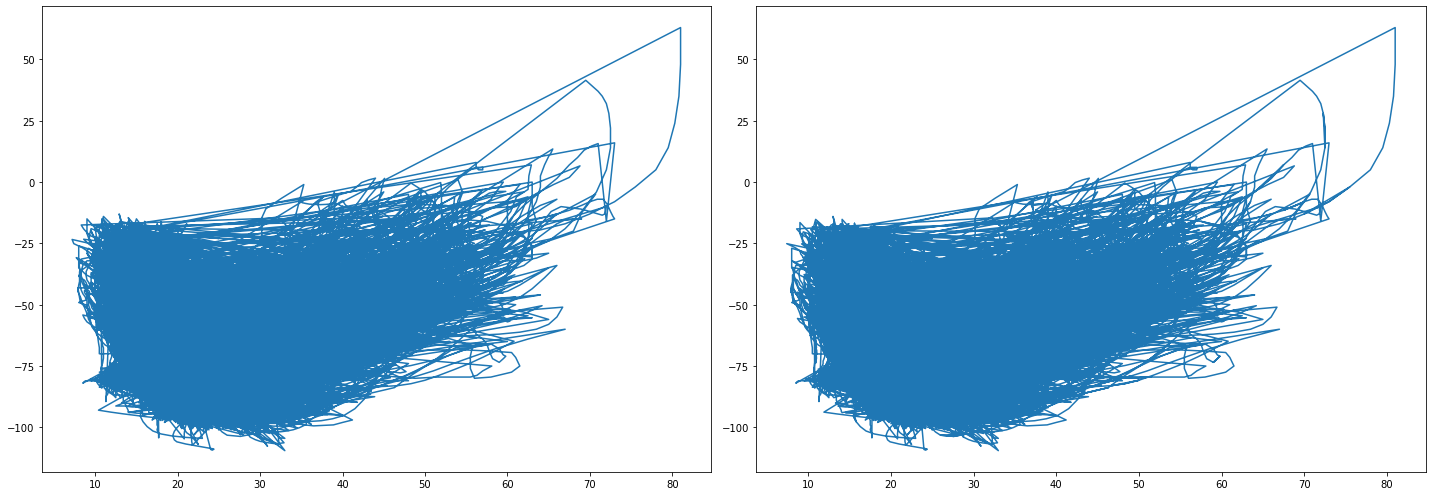

In [6]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))


ax1.plot(np_atlantic[const.LAT], np_atlantic[const.LONG])
ax2.plot(ip_atlantic[const.LAT], ip_atlantic[const.LONG])
plt.tight_layout()

In [10]:
%%time

np_gulls = spatial.create_distance_between_consecutive_column(np_gulls)
ip_gulls = ip.interpolate_position(dataframe=np_gulls,
                                   time_jump=3600*4,
                                   ip_type='cubic')
ip_gulls.head()

CPU times: user 2min 21s, sys: 203 ms, total: 2min 22s
Wall time: 2min 22s


lat       lon  Distance_prev_to_curr
traj_id DateTime                                                      
91732   2009-05-27 14:00:00  61.24783  24.58617                    NaN
        2009-05-27 20:00:00  61.23267  24.58217            1699.244398
        2009-05-28 05:00:00  61.18833  24.53133            5632.120064
        2009-05-28 08:00:00  61.23283  24.58200            5643.314949
        2009-05-28 14:00:00  61.23267  24.58250              32.131494

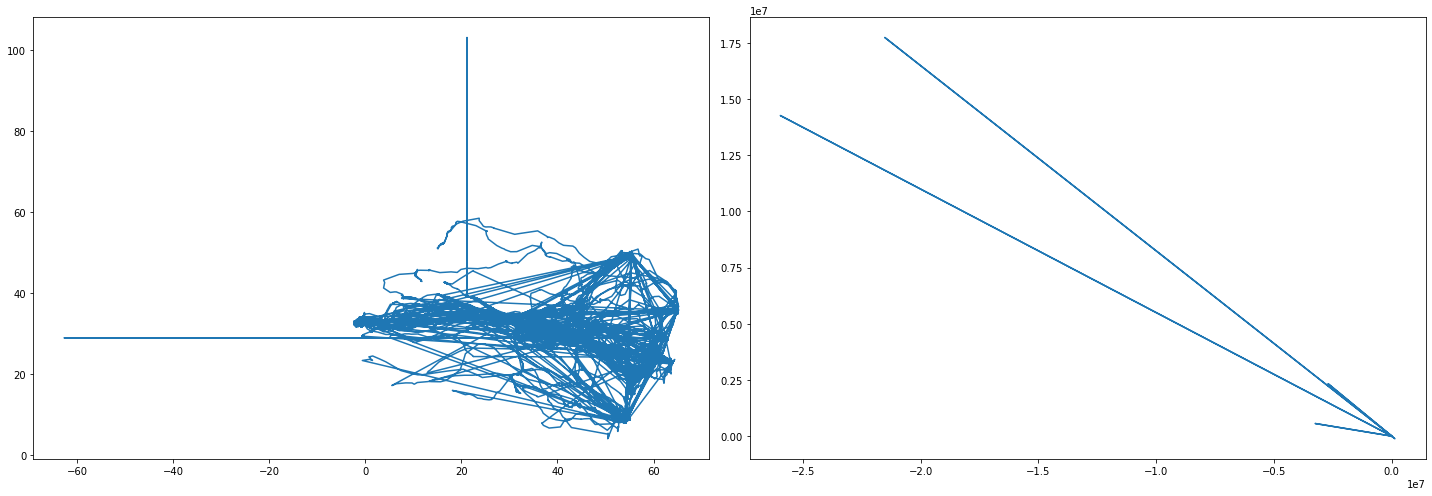

In [12]:
import matplotlib.pyplot as plt
fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))


ax1.plot(np_gulls[const.LAT], np_gulls[const.LONG])
ax2.plot(ip_gulls[const.LAT], ip_gulls[const.LONG])
plt.tight_layout()

In [13]:
filtered_df = filt.filter_outliers_by_consecutive_distance(ip_gulls)

In [14]:
%%time

small = filt.hampel_outlier_detection(ip_gulls, 'Distance_prev_to_curr')
small.shape

CPU times: user 37.5 s, sys: 11.8 ms, total: 37.6 s
Wall time: 37.6 s


/home/yjharanwala/Desktop/NumMobility/preprocessing/filters.py:698: UserWarning: If kinematic features have been generated on the dataframe, then make sure to generate them again as outlier detection drops the point from the dataframe and does not run the kinematic features again.
  warnings.warn("If kinematic features have been generated on the dataframe, then make "


(100889, 3)

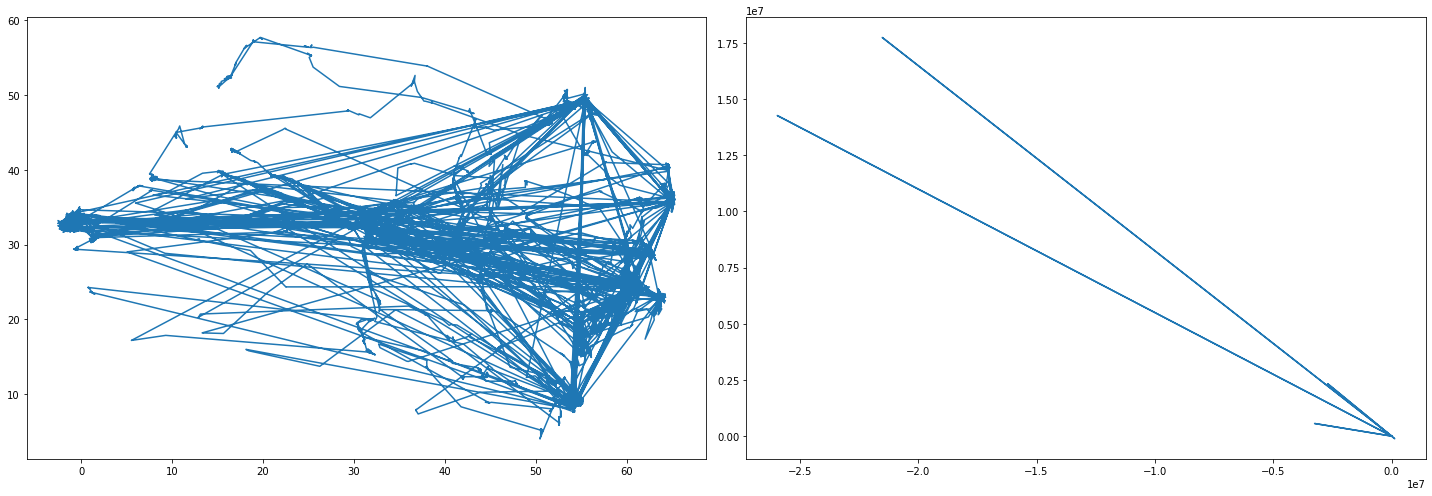

In [15]:
fig4, (bx1, bx2) = plt.subplots(1, 2, figsize=(20, 7))


bx1.plot(filtered_df[const.LAT], filtered_df[const.LONG])
bx2.plot(small[const.LAT], small[const.LONG])
plt.tight_layout()